In [1]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
class Input(object):
    def __init__(self,input_shape):
        self.input_shape = input_shape
        pass
    
    def forward(self,x):
        if x.shape != self.input_shape:
            raise Exception('Exception: x.shape != self.input_shape')
        return x
    
    def __rep__(self):
        return "{0}".format(self.__class__)
    
    def __str__(self):
        return "Input shape : {0}".format(self.input_shape)

In [3]:
class Dense(object):
    def __init__(self,inputs, units, activation, learning_rate=None):
        self.activation = activation
        self.inputs = inputs
        self.units = units
        
        self.weights = np.random.rand(inputs,units)
        
        if learning_rate is None:
            learning_rate = 0.5
        self.learning_rate = learning_rate
        pass
    
    def forward(self,x):
        self.activated = self.activation((np.dot(self.weights.T,x)))
        return self.activated
    
    def update(self,x):
        self.weights -= x*self.learning_rate
        pass
    
    def __rep__(self):
        return "{0}".format(self.__class__)
    
    def __str__(self):
        return "Weights : {0}".format(self.weights)

In [4]:
class Model(object):
    def __init__(self, placeholder=None):
        self.placeholder = placeholder
        self.layers = []
        pass
    
    def add(self,layer=None):
        self.layers.append(layer)
        pass
    
    def fit(self,x,labels,epochs,loss, optimizer):
        history = []
        
        input_layer  = self.layers[0]
        hidden_layer = self.layers[1]
        output_layer = self.layers[2]
        
        for _ in tqdm(range(epochs)):
            cost = 0.0
            for i in range(len(x_train)):
                xx = np.array(x[i])
                yy = np.array(labels[i])
                
                # Forward propagation
                a0 = input_layer.forward(xx)
                a1 = hidden_layer.forward(a0)
                o  = output_layer.forward(a1)

                diff = (o-yy)
                cost += loss(diff)
                
                # Back propagation
                common = (diff)*optimizer(o)
                w1 = np.dot(common,a1.T)
                w0 = np.dot((np.dot(common.T,output_layer.weights.T)*optimizer(a1.T)).T,a0.T)
                
                # Update weights
                output_layer.update(w1.T)
                hidden_layer.update(w0.T)
                
            history.append(cost/len(x_train))
            
        return history
    
    def predict(self,x):
        input_layer  = self.layers[0]
        hidden_layer = self.layers[1]
        output_layer = self.layers[2]
        
        a0 = input_layer.forward(x)
        a1 = hidden_layer.forward(a0)
        o  = output_layer.forward(a1)
        
        return o
    
    def __rep__(self):
        return "{0}".format(self.__class__)
    
    def __str__(self):
        return "Layers : {0}".format(self.layers)

In [5]:
# Activation function(s)
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def sigmoid_prime(x):
    return x*(1.0-x)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

# Loss function(s)
def rmse(x):
    return np.sum(np.square(x)/2)

In [6]:
x_train = np.array([
                    [[1],[0]],
                    [[0],[0]],
                    [[0],[1]],
                    [[1],[1]]
                   ])
y_train = np.array([
                    [[0]],
                    [[0]],
                    [[0]],
                    [[1]]
                    ])

In [7]:
model = Model()

model.add(Input(input_shape=(2,1)))
model.add(Dense(inputs=2, units=3, activation=sigmoid))
model.add(Dense(inputs=3, units=1, activation=sigmoid))

In [8]:
yy = model.fit(x=x_train, labels=y_train, epochs=5000,loss=rmse, optimizer=sigmoid_prime)

100%|██████████| 5000/5000 [00:00<00:00, 8393.97it/s]


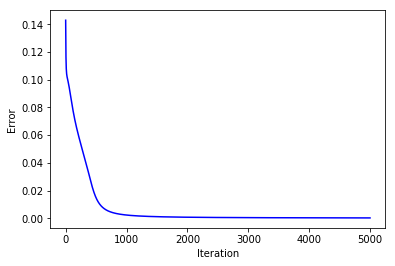

In [9]:
plt.figure()
plt.plot(yy,color = 'b')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

In [10]:
model.predict(np.array([[0],[1]]))

array([[0.022207]])

In [11]:
model.predict(np.array([[1],[1]]))

array([[0.96962324]])